# iris data set

### importing the libraries and the iris data set:

In [194]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

### Defining the information in the conventional way of machine learning:

In [2]:
X=iris.data
y=iris.target

# Displaying the data

#### There are 4 features, and we can only plot 2 in each figure, so total of 6 figures:

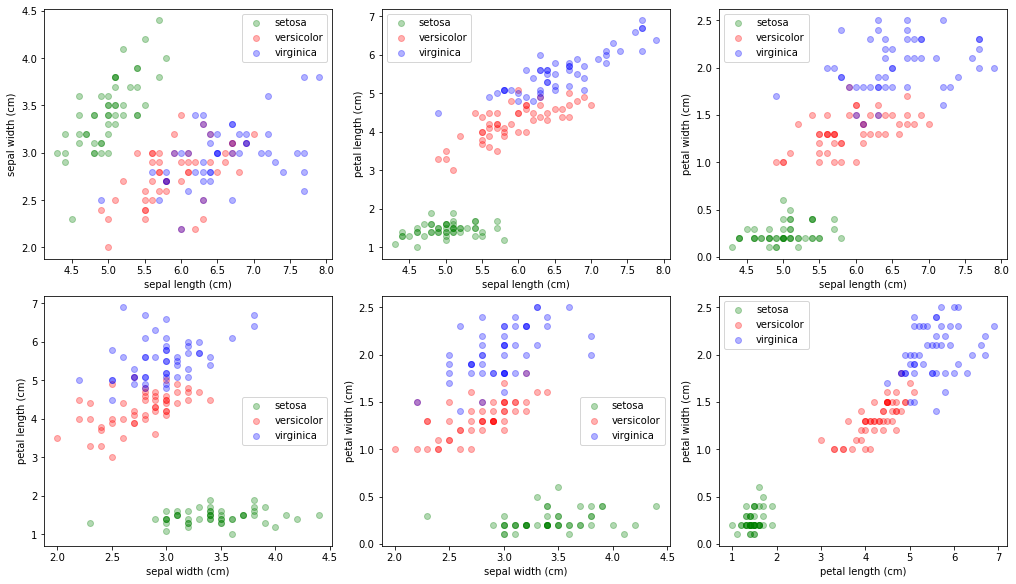

In [3]:
colors=["g", "r", "b"] #different color for each iris species.

features_number=range(len(iris.feature_names))
order=[(a,b) for a in features_number for b in features_number[a:] if b!=a] #tells which 2 features to plot each time.

fig, ax = plt.subplots(2, 3,constrained_layout=True, figsize=(14,8))

for j, (a,b) in enumerate(order):
    for i in range(len(iris.target_names)):
        plottedSpecies = X[y==i]
        a1 , a2 = j//3 , j%3  #the subplot position
        ax[a1,a2].scatter(plottedSpecies[:,a],plottedSpecies[:,b],c=colors[i], label=iris.target_names[i],alpha=0.3)
        ax[a1,a2].set_xlabel(iris.feature_names[a])
        ax[a1,a2].set_ylabel(iris.feature_names[b])
        ax[a1,a2].legend()

So first we can see that one of the species of irises ('setosa' - the green dots) is easy to separate from the rest. And the other two species ('versicolor' and 'virginica' - the red and blue dots) are more difficult to separate.

For example, in the top left image where the two features are the dimensions of the sepals, we can see that the two species are really mixed well inside each other.

The image with the best separation is at the bottom right, where the two features are the dimensions of the petals, moreover, in that particular image, it is also easiest to separate the green dots (largest margin).

## Trying Logistic Regression

In [165]:
#spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#training the model
model=LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

#testing the predictions
errors= model.predict(X_test)==y_test
success_rate= sum(errors) / len(errors) * 100
print(f'successfully classified {success_rate:.2f}% of the test set.' )

successfully classified 100.00% of the test set.


The model correctly classifies all the samples in the test group, or sometimes has 1-2 errors, it depends on the initial split of the function "train_test_split"

When we plotted the data, we saw that the important features for classifying the irises are the dimensions of the petals. Therefore, we will try to give up on half of the features (the dimensions of the sepals) and see if we can achieve the same results only with the remaining two features:

In [193]:
#spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#training the model
model4 = LogisticRegression(max_iter=200) #using all the 4 features
model4.fit(X_train, y_train)

model2 = LogisticRegression(max_iter=200) #using only 2 features (the petals dimensions)
model2.fit(X_train[:,2:], y_train)

#testing the predictions
errors4= model.predict(X_test)==y_test
success_rate4= sum(errors4) / len(errors4) * 100

errors2= model2.predict(X_test[:,2:])==y_test
success_rate2= sum(errors2) / len(errors2) * 100

print(f'The normal model successfully classified {success_rate4:.2f}% of the test set,' )
print(f'and the 2 features model successfully classified {success_rate2:.2f}% of the test set.' )

The normal model successfully classified 96.67% of the test set,
and the 2 features model successfully classified 96.67% of the test set.


I was expecting to see the accuracy of the Model_2 to be the same or a little less than that of Model_4, which is indeed what happens.

## Trying K Nearest Neighbors Algorithm

In [245]:
#spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

for k in range(1,10):
    #training the model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    #testing the predictions
    errors= knn.predict(X_test)==y_test
    success_rate= sum(errors) / len(errors) * 100
    print(f'for k={k}, KNN successfully classified {success_rate:.2f}% of the test set.' )

for k=1, KNN successfully classified 96.67% of the test set.
for k=2, KNN successfully classified 93.33% of the test set.
for k=3, KNN successfully classified 96.67% of the test set.
for k=4, KNN successfully classified 96.67% of the test set.
for k=5, KNN successfully classified 93.33% of the test set.
for k=6, KNN successfully classified 93.33% of the test set.
for k=7, KNN successfully classified 96.67% of the test set.
for k=8, KNN successfully classified 90.00% of the test set.
for k=9, KNN successfully classified 93.33% of the test set.


After running this few times, I can not say that there is a clear advantage for any particular K value over the rest.